In [1]:
import pandas as pd
 
input_book = pd.ExcelFile('/home/brain/Downloads/心理検査DB_差分入り.xlsx')
result_lh_df = pd.read_table("/home/brain/Downloads/lh.ilf.All.csv")
result_rh_df = pd.read_table("/home/brain/Downloads/rh.ilf.All.csv")

#sheet_namesメソッドでExcelブック内の各シートの名前をリストで取得できる
input_sheet_name = input_book.sheet_names

In [2]:
#DataFrameとして一つ目のsheetを読込
fu_sheet_df = input_book.parse(input_sheet_name[0])
fu_sheet_df=fu_sheet_df[fu_sheet_df[fu_sheet_df.columns[0]].str.contains("",na=False)]

#読み込んだシート名の確認
print("Sheet name:", input_sheet_name[0])

fu_sheet_df=fu_sheet_df.iloc[:,0:24]
fu_sheet_df=fu_sheet_df.drop(fu_sheet_df.columns[[21,22]],axis=1)
#読み込んだシートの先頭5行を表示
print(fu_sheet_df.shape)#head(5))

Sheet name: follow_without29
(51, 22)


In [3]:
#DataFrameとして3つ目のsheetを読込（グラフはsheetとしてカウントされない？）
bl_sheet_df = input_book.parse(input_sheet_name[1])
bl_sheet_df=bl_sheet_df[bl_sheet_df[bl_sheet_df.columns[0]].str.contains("",na=False)]

#読み込んだシート名の確認
print("Sheet name:", input_sheet_name[1])

bl_sheet_df=bl_sheet_df.drop(bl_sheet_df.columns[[21,23,27,28]],axis=1)
#読み込んだシートの先頭5行を表示
print(bl_sheet_df.shape)#head(5))

Sheet name: baseline_without29
(51, 29)


In [4]:
bl_fu_sheet_df=pd.merge(bl_sheet_df, fu_sheet_df, left_on=bl_sheet_df.columns[0], right_on=fu_sheet_df.columns[0], how="inner", suffixes = ["_bl", "_fu"])
bl_fu_sheet_df.columns=bl_fu_sheet_df.columns.str.replace(" ","_")
bl_fu_sheet_df.columns=bl_fu_sheet_df.columns.str.replace("\n","_")
print(bl_fu_sheet_df.shape)#head(5))

(51, 50)


In [5]:
result_bilateral_df=pd.merge(result_lh_df, result_rh_df, left_on=result_lh_df.columns[0], right_on=result_rh_df.columns[0], how="inner", suffixes = ["_lh", "_rh"])
print(result_bilateral_df.shape)#head(5))

(103, 38)


In [6]:
bl_bilateral_df=result_bilateral_df[result_bilateral_df[result_bilateral_df.columns[0]].str.endswith('_1')]
fu_bilateral_df=result_bilateral_df[result_bilateral_df[result_bilateral_df.columns[0]].str.endswith('_2')]
print(bl_bilateral_df.shape)#head(5))
print(fu_bilateral_df.shape)#head(5))

(51, 38)
(52, 38)


In [7]:
bl_bilateral_df["研究ID"]=bl_bilateral_df[bl_bilateral_df.columns[0]].str[0:6]
fu_bilateral_df["研究ID"]=fu_bilateral_df[fu_bilateral_df.columns[0]].str[0:6]
bl_fu_bilateral_df=pd.merge(bl_bilateral_df.drop(columns=bl_bilateral_df.columns[0]), fu_bilateral_df.drop(columns=fu_bilateral_df.columns[0]), on="研究ID", how="inner", suffixes = ["_bl", "_fu"]).sort_values(by="研究ID")
print(bl_fu_bilateral_df.shape)#head(5))

(51, 75)


/home/brain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/brain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
df_result=pd.merge(bl_fu_sheet_df, bl_fu_bilateral_df, left_on=bl_fu_sheet_df.columns[0], right_on="研究ID", how="inner").sort_values(by="研究ID")
print(df_result.shape)
#print(df_result)
print(type(df_result))

(50, 124)
<class 'pandas.core.frame.DataFrame'>


In [9]:
df_result=df_result.T.drop_duplicates().T # 重複列削除
df_result=df_result.set_index("研究ID")
print(df_result.shape)
print(type(df_result))
df_result.to_csv('/home/brain/Downloads/df_result.csv')
df_result = pd.read_csv('/home/brain/Downloads/df_result.csv')
df_result=df_result.set_index("研究ID")
df_result=df_result.drop(columns=["検査日_bl", "検査日_fu", "年齢_fu"])
print(df_result.shape)
print(type(df_result))

(50, 118)
<class 'pandas.core.frame.DataFrame'>
(50, 115)
<class 'pandas.core.frame.DataFrame'>


In [10]:
#print(df_result)
corr_matp = df_result.corr(method='pearson')
#print(corr_matp)
corr_matp=corr_matp.dropna(how = 'all')
corr_matp=corr_matp.dropna(axis = 'columns')
corr_matp.to_csv('/home/brain/Downloads/corr_matp.csv')

/home/brain/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/brain/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 40802 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/brain/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/brain/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/brain/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/brain/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: 

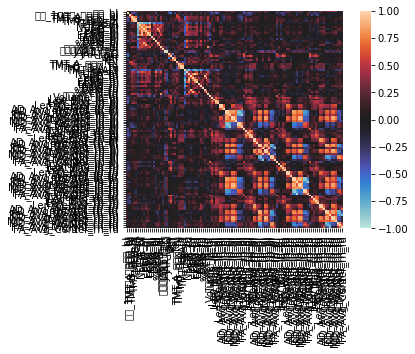

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matp,square=True,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=False, # True:格子の中に値を表示
#            fmt='.1f',
            xticklabels=corr_matp.columns.values,
            yticklabels=corr_matp.columns.values
           )
plt.show()
#fig = plt.figure(figsize=(10,10),dpi=200)
#fig.show()

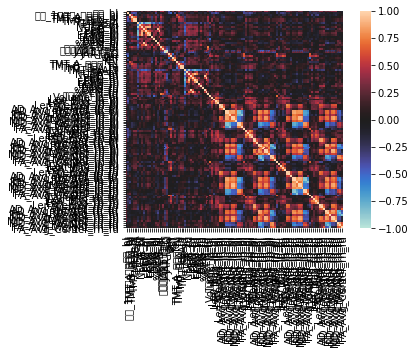

In [12]:
corr_mats = df_result.corr(method='spearman')
corr_mats=corr_mats.dropna(how = 'all')
corr_mats=corr_mats.dropna(axis = 'columns')
corr_mats.to_csv('/home/brain/Downloads/corr_mats.csv')
sns.heatmap(corr_mats,square=True,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=False, # True:格子の中に値を表示
#            fmt='.1f',
            xticklabels=corr_mats.columns.values,
            yticklabels=corr_mats.columns.values
           )
plt.show()

In [13]:
print(corr_matp)

                        年齢_bl  性別_1：男性_２：女性_bl  TMT-A_（秒）_bl  TMT-B_（秒）_bl  \
年齢_bl                1.000000        -0.057709      0.009567      0.259062   
性別_1：男性_２：女性_bl     -0.057709         1.000000     -0.030154     -0.348325   
TMT-A_（秒）_bl         0.009567        -0.030154      1.000000      0.535278   
TMT-B_（秒）_bl         0.259062        -0.348325      0.535278      1.000000   
TMT_B-A_bl           0.300761        -0.393755      0.018358      0.854360   
...                       ...              ...           ...           ...   
MD_Avg_Weight_rh_fu  0.388499        -0.120055     -0.058722      0.023767   
MD_Avg_Center_rh_fu  0.393152        -0.078427     -0.133538      0.059480   
FA_Avg_rh_fu        -0.080622        -0.123615     -0.047515      0.075916   
FA_Avg_Weight_rh_fu -0.059905         0.081802     -0.007081      0.111538   
FA_Avg_Center_rh_fu -0.186391         0.055174      0.050919      0.125587   

                     TMT_B-A_bl   TMT_B/A     CA_bl   NUCA_bl  

In [14]:
print(corr_mats)

                        年齢_bl  性別_1：男性_２：女性_bl  TMT-A_（秒）_bl  TMT-B_（秒）_bl  \
年齢_bl                1.000000        -0.045562      0.041901      0.362613   
性別_1：男性_２：女性_bl     -0.045562         1.000000     -0.056726     -0.355486   
TMT-A_（秒）_bl         0.041901        -0.056726      1.000000      0.490509   
TMT-B_（秒）_bl         0.362613        -0.355486      0.490509      1.000000   
TMT_B-A_bl           0.274140        -0.435070     -0.142919      0.728223   
...                       ...              ...           ...           ...   
MD_Avg_Weight_rh_fu  0.366051        -0.128534     -0.120668      0.026997   
MD_Avg_Center_rh_fu  0.404296        -0.136094     -0.181338      0.051591   
FA_Avg_rh_fu        -0.027779        -0.113412     -0.065906      0.060574   
FA_Avg_Weight_rh_fu -0.055318         0.079388     -0.003507      0.027717   
FA_Avg_Center_rh_fu -0.113625        -0.026463      0.040207      0.145935   

                     TMT_B-A_bl   TMT_B/A     CA_bl   NUCA_bl  